# SLEEPCYCLE PROJECT

In this project, I will analyze the data I've been collecting through an app called sleep cycle for the past two years.

The first thing I had to do was export the data from the app. I exported as a .csv file.

Then I had to open the .csv files to remove some columns that didn't have any information because they are optional when defining the app settings, such as mood, notes, city, and weather info.

Once I did that, I created a database in pgadmin. Finally, I made a table and imported the .csv using the code below.

CREATE TABLE public.sleep data
(
    start_time timestamp without time zone,
    end_time timestamp without time zone,
    sleep_quality numeric,
    regularity numeric,
    alarm_mode character varying(50),
    air_pressure numeric,
    movements_per_hour numeric,
    bed_time numeric,
    asleep_time numeric,
    fall_asleep_time numeric,
    alarm_start timestamp without time zone,
    alarm_stop timestamp without time zone,
    snore character varying(50),
    snore_time numeric
);

COPY public.sleepdata FROM 'C:\Users\Samsung\Documents\Portfolio\sleepcycle\sleepdata.csv' DELIMITER ',' CSV HEADER;

With everything ready, I started my EDA, as shown in the rest of this notebook.

In [253]:
import psycopg2 as pg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
conn = pg2.connect(database='sleepcycle', user='postgres',password = 'senha')
cur = conn.cursor()

In [255]:
cur.execute("SELECT * FROM sleepdata")
data1 = cur.fetchall()
df1 = pd.DataFrame(data1, columns=[
    'start_time',
    'end_time',
    'sleep_quality',
    'regularity',
    'alarm_mode',
    'air_pressure',
    'movements_per_hour',
    'bed_time',
    'asleep_time',
    'fall_asleep_time',
    'alarm_start',
    'alarm_stop',
    'snore',
    'snore_time'])
df1

,start_time,end_time,sleep_quality,regularity,alarm_mode,air_pressure,movements_per_hour,bed_time,asleep_time,fall_asleep_time,alarm_start,alarm_stop,snore,snore_time
0,2021-02-17 23:30:06,2021-02-18 06:49:30,0.75,0.00,Normal,100.60,72.50,26364.20,19333.80,2021.30,2021-02-18 06:20:00,2021-02-18 06:50:00,true,0.00
1,2021-02-18 23:32:30,2021-02-19 07:25:13,0.74,0.00,Normal,100.70,87.50,28363.50,23730.80,1323.60,2021-02-19 07:05:00,2021-02-19 07:35:00,true,60.00
2,2021-02-20 04:24:55,2021-02-20 11:04:00,0.68,0.29,No alarm,100.90,80.90,23945.30,18198.40,1676.20,NaT,NaT,true,0.00
3,2021-02-21 00:05:00,2021-02-21 08:32:39,0.98,0.36,No alarm,101.10,65.30,30459.70,24367.70,2030.60,NaT,NaT,true,0.00
4,2021-02-22 00:09:07,2021-02-22 07:24:00,0.68,0.54,Normal,101.10,85.40,26092.60,20787.10,2261.40,2021-02-22 07:10:00,2021-02-22 07:40:00,true,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,2022-09-29 22:20:48,2022-09-30 05:56:03,0.80,0.87,Normal,101.50,70.50,27315.20,24310.50,546.30,2022-09-30 05:25:00,2022-09-30 05:55:00,true,0.00
447,2022-10-02 23:30:44,2022-10-03 07:33:29,0.82,0.77,Normal,101.30,82.30,28965.50,24813.80,579.30,2022-10-03 07:05:00,2022-10-03 07:35:00,true,360.00
448,2022-10-03 22:58:42,2022-10-04 07:00:11,0.88,0.91,Normal,101.10,52.00,28889.20,19644.60,1348.20,2022-10-04 06:30:00,2022-10-04 07:00:00,true,0.00
449,2022-10-04 21:50:24,2022-10-05 05:55:39,0.86,0.86,Normal,101.20,65.90,29115.70,25913.00,1552.80,2022-10-05 05:25:00,2022-10-05 05:55:00,true,0.00


First, I'd like to analyze the average sleep quality by year.

In [256]:
cur.execute("""SELECT 
                EXTRACT (YEAR FROM start_time), 
                AVG(sleep_quality) 
                FROM sleepdata 
                GROUP BY EXTRACT (YEAR FROM start_time)""")
cur.fetchall()

[(Decimal('2022'), Decimal('0.73397905759162303665')),
 (Decimal('2021'), Decimal('0.77507692307692307692'))]

We can see that the quality of my sleep in 2021 is slightly above 2022. It's important to say, though, that I do not have the whole year's data for 2022, which can influence the analysis. So let's see the quality of my sleep throughout the months we have data.

In [257]:
cur.execute("""SELECT TO_CHAR(start_time, 'YYYY-MM'), 
            AVG(sleep_quality) 
            FROM sleepdata 
            GROUP BY TO_CHAR(start_time, 'YYYY-MM') 
            ORDER BY TO_CHAR(start_time, 'YYYY-MM')""")
data2 = cur.fetchall()
df2 = pd.DataFrame(data2, columns=['year_month', 'average_quality'])
df2

,year_month,average_quality
0,2021-02,0.75900000000000000000
1,2021-03,0.76892857142857142857
2,2021-04,0.72814814814814814815
3,2021-05,0.78560000000000000000
4,2021-06,0.74928571428571428571
5,2021-07,0.78500000000000000000
6,2021-08,0.82000000000000000000
7,2021-09,0.82300000000000000000
8,2021-10,0.80250000000000000000
9,2021-11,0.77333333333333333333


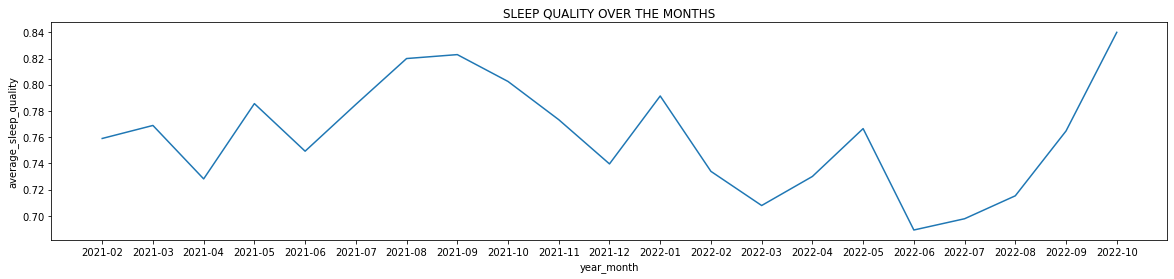

In [258]:
plt.figure(figsize = (20, 4))
sns.lineplot(x='year_month', y='average_quality', data=df2)
plt.xlabel('year_month')
plt.ylabel('average_sleep_quality')
plt.title('SLEEP QUALITY OVER THE MONTHS')
plt.show()

We can see that the quality of my sleep was more consistent during 2021, suffered a significant drop during the first half of 2022, and has been improving a lot since then.

Having the data of more than 400 nights of my sleep, I was curious to know the 30 best nights of sleep I had in the last year and a half and what that represented in terms of time in bed and time sleeping.

In [259]:
cur.execute("""SELECT (bed_time/3600), 
            (asleep_time/3600), 
            sleep_quality 
            FROM sleepdata 
            ORDER BY sleep_quality DESC 
            LIMIT 30""")
cur.fetchall()

[(Decimal('9.2356111111111111'),
  Decimal('8.0349722222222222'),
  Decimal('1.00')),
 (Decimal('8.4610277777777778'),
  Decimal('6.7688055555555556'),
  Decimal('0.98')),
 (Decimal('9.0022222222222222'),
  Decimal('7.6518888888888889'),
  Decimal('0.98')),
 (Decimal('9.0924444444444444'),
  Decimal('8.1528888888888889'),
  Decimal('0.98')),
 (Decimal('7.5338611111111111'),
  Decimal('6.5544722222222222'),
  Decimal('0.97')),
 (Decimal('8.5542500000000000'),
  Decimal('7.4421944444444444'),
  Decimal('0.96')),
 (Decimal('9.0733888888888889'),
  Decimal('7.5611666666666667'),
  Decimal('0.96')),
 (Decimal('7.3578888888888889'),
  Decimal('6.9409444444444444'),
  Decimal('0.95')),
 (Decimal('8.0380277777777778'),
  Decimal('6.8055555555555556'),
  Decimal('0.95')),
 (Decimal('9.1640277777777778'),
  Decimal('8.5225555555555556'),
  Decimal('0.95')),
 (Decimal('8.5059722222222222'),
  Decimal('7.3151388888888889'),
  Decimal('0.93')),
 (Decimal('8.5425000000000000'),
  Decimal('6.63466666

In [260]:
cur.execute("""WITH top_nights AS (
            SELECT (bed_time/3600) AS bed_time_hours, 
            (asleep_time/3600) AS asleep_time_hours, 
            sleep_quality FROM sleepdata 
            ORDER BY sleep_quality DESC 
            LIMIT 30) 

            SELECT AVG(bed_time_hours), 
            AVG(asleep_time_hours)
            FROM top_nights""")
cur.fetchall()

[(Decimal('8.4687731481481482'), Decimal('7.1411787037037037'))]

This concept of time in bed and time sleeping is interesting because we can observe that both are pretty divergent. In my case, we can see that the best sleep days I've had were when I spent, on average, 8.46 hours in bed but only 7.14 hours sleeping. 

This difference leaves me wondering how many hours of bedtime I need to get at least 7 hours of sleep on average.

In [261]:
cur.execute("""SELECT AVG(bed_time)/3600
            FROM sleepdata 
            WHERE (asleep_time/3600) > 7""")
cur.fetchall()

[(Decimal('8.5801712962962964'),)]

So that confirms what we had already seen from the top 30 nights and gives me the insight that I should aim to spend at least 8.5 hours in bed to get a fantastic night of sleep.

Now that we have seen how the quality of my sleep behaves in relation to the amount of time I spend in bed, I think it'd be interesting to see what impact the time I go to bed has.

I started by creating a function to retrieve the intervals for the start_time variable that I have, as shown in the code below. Then I proceeded to see how many nights I had in each interval and how the sleep data I had behaved for each interval.

In [262]:
# CREATE FUNCTION inter(n timestamp) RETURNS varchar as $$
#               BEGIN 
#               RETURN 
#               CASE 
#               WHEN TO_CHAR(date, 'HH24:MI:SS') BETWEEN '20:00:00'AND '21:59:59' THEN 'int_1'
#               WHEN TO_CHAR(date, 'HH24:MI:SS') BETWEEN '22:00:00'AND '23:59:59' THEN 'int_2'
#               WHEN TO_CHAR(date, 'HH24:MI:SS') BETWEEN '00:00:00'AND '01:59:59' THEN 'int_3'
#               WHEN TO_CHAR(date, 'HH24:MI:SS') BETWEEN '02:00:00'AND '03:59:59' THEN 'int_4'
#               ELSE 'int_5'
#               END;
#               END;
#               $$ LANGUAGE plpgsql

In [263]:
cur.execute("""SELECT start_time,
               inter(start_time)
               FROM sleepdata""")
data3 = cur.fetchall()
df3 = pd.DataFrame(data3, columns=['start_time', 'interval'])
crosstb = pd.crosstab(index=df3['interval'], columns='count')
crosstb

col_0,count
interval,
int_1,11
int_2,270
int_3,125
int_4,27
int_5,18


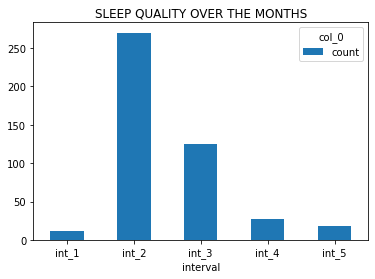

In [264]:
crosstb.plot.bar(rot=0)
plt.title('SLEEP QUALITY OVER THE MONTHS')
plt.show()

After getting the intervals and making a frequency table and a bar plot of them, we can see that I usually go to sleep between 22:00:00 and 23:59:59. And sometimes, a little bit later, I go to bed between 00:00:00 and 01:59:59.

Now let's see how that impacts the other aspects of my sleep.

In [265]:
cur.execute("""SELECT AVG(movements_per_hour), 
               AVG(sleep_quality), 
               AVG(air_pressure),
               inter(start_time) 
               FROM sleepdata
               GROUP BY  inter(start_time)
               ORDER BY AVG(sleep_quality) DESC""")
data4 = cur.fetchall()
df4 = pd.DataFrame(data4, columns=['average_movements', 'average_sleep_quality', 'average_air_pressure', 'start_time_interval'])
df4

,average_movements,average_sleep_quality,average_air_pressure,start_time_interval
0,81.6818181818181818,0.82818181818181818182,101.5545454545454545,int_1
1,537.3807407407407407,0.78900000000000000000,101.3407407407407407,int_2
2,512.1384000000000000,0.72584000000000000000,101.2776000000000000,int_3
3,727.2185185185185185,0.64592592592592592593,101.2481481481481481,int_4
4,2682.3388888888888889,0.63333333333333333333,101.2777777777777778,int_5


In [266]:
(df4.iloc[1,1]/df4.iloc[2,1]-1)*100

Decimal('8.701642235203350600683346200')

It's interesting to see that there's not a considerable difference between the two most frequent intervals when we look at the average_air_pressure and average_movements.

As for the sleep quality, it doesn't seem like a vast difference either. But when we do the math, we have a fantastic insight: my sleep quality increased by 8.7% when I went to bed earlier.

The final analysis I wanted to do was to see how my sleep affects the days of the week. For that, I focused on how much bedtime I got and my sleep quality.

In [267]:
cur.execute("""SELECT AVG(bed_time)/3600 AS bed_time_hours, 
               CONCAT(TO_CHAR(start_time,'DAY'),'/ ',TO_CHAR(end_time,'DAY'))
               FROM sleepdata
               GROUP BY CONCAT(TO_CHAR(start_time,'DAY'),'/ ',TO_CHAR(end_time,'DAY'))""")
data5 = cur.fetchall()
df5 = pd.DataFrame(data5, columns=['bed_time', 'day of the week'])
df5

,bed_time,day of the week
0,7.0744513888888889,SATURDAY / SATURDAY
1,6.5825370370370369,MONDAY / MONDAY
2,7.9626238888888889,SUNDAY / MONDAY
3,6.8591423611111111,TUESDAY / TUESDAY
4,8.9557222222222222,SATURDAY / SUNDAY
5,3.5004722222222222,FRIDAY / SATURDAY
6,7.3663140432098767,WEDNESDAY/ THURSDAY
7,7.6183377777777778,SUNDAY / SUNDAY
8,7.3611138888888889,TUESDAY / WEDNESDAY
9,7.6004094368340944,MONDAY / TUESDAY


[Text(0, 0, 'SATURDAY / SATURDAY '),
 Text(1, 0, 'MONDAY   / MONDAY   '),
 Text(2, 0, 'SUNDAY   / MONDAY   '),
 Text(3, 0, 'TUESDAY  / TUESDAY  '),
 Text(4, 0, 'SATURDAY / SUNDAY   '),
 Text(5, 0, 'FRIDAY   / SATURDAY '),
 Text(6, 0, 'WEDNESDAY/ THURSDAY '),
 Text(7, 0, 'SUNDAY   / SUNDAY   '),
 Text(8, 0, 'TUESDAY  / WEDNESDAY'),
 Text(9, 0, 'MONDAY   / TUESDAY  '),
 Text(10, 0, 'WEDNESDAY/ WEDNESDAY'),
 Text(11, 0, 'FRIDAY   / FRIDAY   '),
 Text(12, 0, 'THURSDAY / THURSDAY '),
 Text(13, 0, 'THURSDAY / FRIDAY   ')]

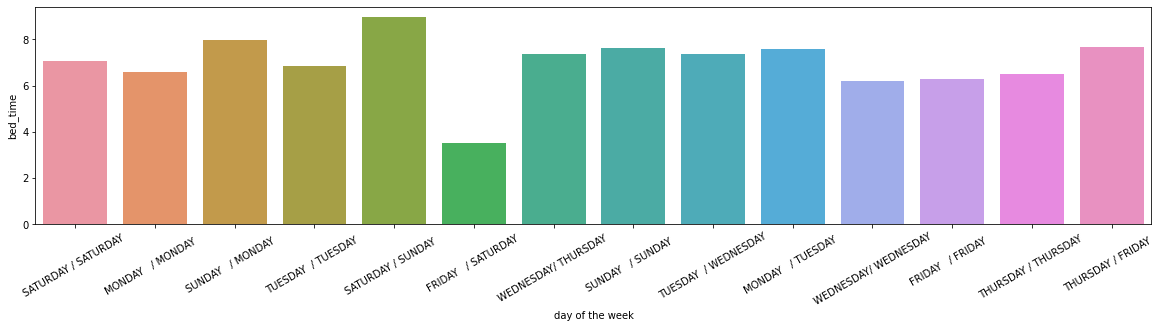

In [268]:
plt.figure(figsize = (20, 4))
b = sns.barplot(x='day of the week', y='bed_time', data=df5)
b.set_xticklabels(b.get_xticklabels(),rotation = 30)

From the data retrieved by the query and the chart, we can see that Saturday through Sunday is when I usually get the most bedtime, followed by Sunday through Monday. This makes sense since those are the days I typically let myself sleep in. Another exciting thing to see is the Friday through Saturday bedtime, which is the lowest of all. Considering that Saturday / Saturday is not that low, I'd say it is because I usually have something to do on Saturday morning when I sleep early on Friday (before midnight).

Now to wrap things up, I'm going to look at how sleep quality behaves.

In [269]:
cur.execute("""SELECT AVG(sleep_quality) AS avg_sleep_quality, 
               CONCAT(TO_CHAR(start_time,'DAY'),'/ ',TO_CHAR(end_time,'DAY'))
               FROM sleepdata
               GROUP BY CONCAT(TO_CHAR(start_time,'DAY'),'/ ',TO_CHAR(end_time,'DAY'))""")
data6 = cur.fetchall()
df6 = pd.DataFrame(data6, columns=['sleep_quality', 'day of the week'])
df6

,sleep_quality,day of the week
0,0.71062500000000000000,SATURDAY / SATURDAY
1,0.68666666666666666667,MONDAY / MONDAY
2,0.77740000000000000000,SUNDAY / MONDAY
3,0.69625000000000000000,TUESDAY / TUESDAY
4,0.84857142857142857143,SATURDAY / SUNDAY
5,0.38000000000000000000,FRIDAY / SATURDAY
6,0.78166666666666666667,WEDNESDAY/ THURSDAY
7,0.74840000000000000000,SUNDAY / SUNDAY
8,0.77300000000000000000,TUESDAY / WEDNESDAY
9,0.80698630136986301370,MONDAY / TUESDAY


[Text(0, 0, 'SATURDAY / SATURDAY '),
 Text(1, 0, 'MONDAY   / MONDAY   '),
 Text(2, 0, 'SUNDAY   / MONDAY   '),
 Text(3, 0, 'TUESDAY  / TUESDAY  '),
 Text(4, 0, 'SATURDAY / SUNDAY   '),
 Text(5, 0, 'FRIDAY   / SATURDAY '),
 Text(6, 0, 'WEDNESDAY/ THURSDAY '),
 Text(7, 0, 'SUNDAY   / SUNDAY   '),
 Text(8, 0, 'TUESDAY  / WEDNESDAY'),
 Text(9, 0, 'MONDAY   / TUESDAY  '),
 Text(10, 0, 'WEDNESDAY/ WEDNESDAY'),
 Text(11, 0, 'FRIDAY   / FRIDAY   '),
 Text(12, 0, 'THURSDAY / THURSDAY '),
 Text(13, 0, 'THURSDAY / FRIDAY   ')]

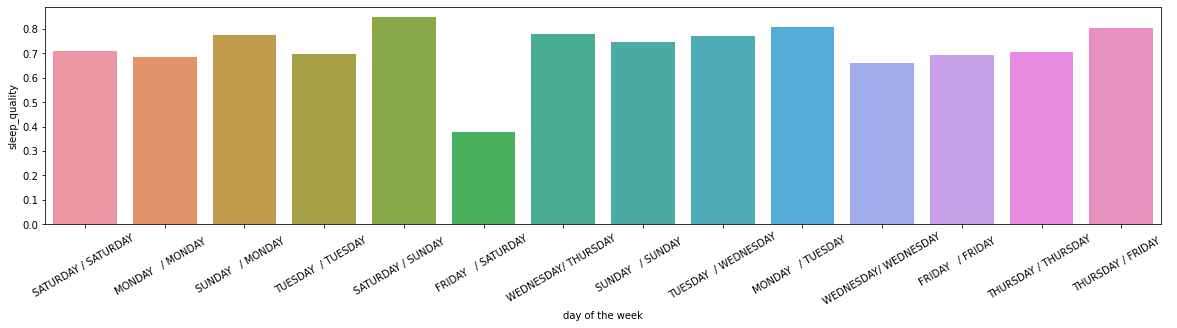

In [270]:
plt.figure(figsize = (20, 4))
b2 = sns.barplot(x='day of the week', y='sleep_quality', data=df6)
b2.set_xticklabels(b2.get_xticklabels(),rotation = 30)

We can see that the bar plot of sleep quality looks very similar to the bar plot of bedtime, with Monday / Sunday being the highest quality sleep I get as well as the most bedtime.

And that concludes an exploratory data analysis of almost two years of sleep data I collected of myself, resulting in some fascinating insights.